In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib
import math
import random
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)


sns.set_style(style="darkgrid")
dfs = pd.read_csv('news_total.csv') 

time.struct_time(tm_year=2020, tm_mon=7, tm_mday=9, tm_hour=18, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=191, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=3, tm_mday=26, tm_hour=17, tm_min=7, tm_sec=0, tm_wday=3, tm_yday=86, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=6, tm_mday=16, tm_hour=22, tm_min=51, tm_sec=0, tm_wday=1, tm_yday=168, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=4, tm_mday=17, tm_hour=21, tm_min=43, tm_sec=0, tm_wday=4, tm_yday=108, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=4, tm_mday=19, tm_hour=21, tm_min=50, tm_sec=0, tm_wday=6, tm_yday=110, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=4, tm_mday=29, tm_hour=21, tm_min=57, tm_sec=0, tm_wday=2, tm_yday=120, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=3, tm_mday=6, tm_hour=15, tm_min=26, tm_sec=0, tm_wday=4, tm_yday=66, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=6, tm_mday=30, tm_hour=8, tm_min=14, tm_sec=0, tm_wday=1, tm_yday=182, tm_isdst=-1)
time.struct_time(tm_yea

time.struct_time(tm_year=2020, tm_mon=6, tm_mday=14, tm_hour=19, tm_min=6, tm_sec=0, tm_wday=6, tm_yday=166, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=4, tm_mday=8, tm_hour=21, tm_min=36, tm_sec=0, tm_wday=2, tm_yday=99, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=6, tm_mday=19, tm_hour=8, tm_min=28, tm_sec=0, tm_wday=4, tm_yday=171, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=2, tm_mday=6, tm_hour=11, tm_min=17, tm_sec=0, tm_wday=3, tm_yday=37, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=5, tm_mday=4, tm_hour=22, tm_min=31, tm_sec=0, tm_wday=0, tm_yday=125, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=25, tm_hour=0, tm_min=30, tm_sec=0, tm_wday=5, tm_yday=25, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=5, tm_mday=10, tm_hour=17, tm_min=25, tm_sec=0, tm_wday=6, tm_yday=131, tm_isdst=-1)
time.struct_time(tm_year=2020, tm_mon=8, tm_mday=3, tm_hour=18, tm_min=15, tm_sec=0, tm_wday=0, tm_yday=216, tm_isdst=-1)
time.struct_time(tm_year=2

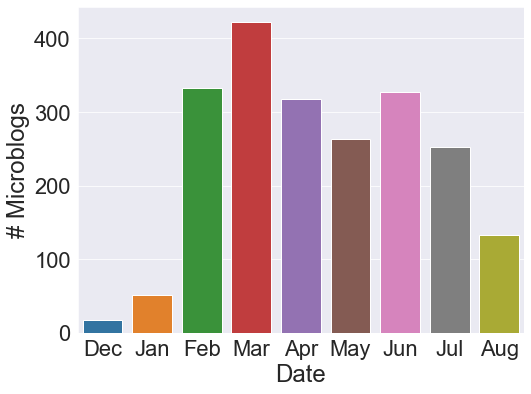

In [15]:
dfs = pd.read_csv('news_total.csv') 
publish_dates = dfs['date'].values
dates = np.array(publish_dates, dtype=str)
nums = np.zeros(publish_dates.shape, dtype=int)
for idx, date in enumerate(dates):
    dates[idx] = date[:7]
    time_array = time.strptime(date, "%Y-%m-%d %H:%M")
    print(time_array)
    nums[idx] = int(time.mktime(time_array))
tem = list(zip(nums, dates))
tem = sorted(tem, key=lambda x: x[0], reverse=True)
num, dates = zip(*tem)

num = np.array(num, dtype=int)
dates = np.array(dates, dtype=str)

dates[ dates=='2019-12' ] = 'Dec'
dates[ dates=='2020-01' ] = 'Jan'
dates[ dates=='2020-02' ] = 'Feb'
dates[ dates=='2020-03' ] = 'Mar'
dates[ dates=='2020-04' ] = 'Apr'
dates[ dates=='2020-05' ] = 'May'
dates[ dates=='2020-06' ] = 'Jun'
dates[ dates=='2020-07' ] = 'Jul'
dates[ dates=='2020-08' ] = 'Aug'

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.figure(figsize=(8,6))
ax = sns.countplot(dates,order = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'])
plt.xlabel('Date')
plt.ylabel('# Microblogs')

plt.savefig("./Date_numOfMicroblog.pdf",bbox_inches='tight')
plt.show()

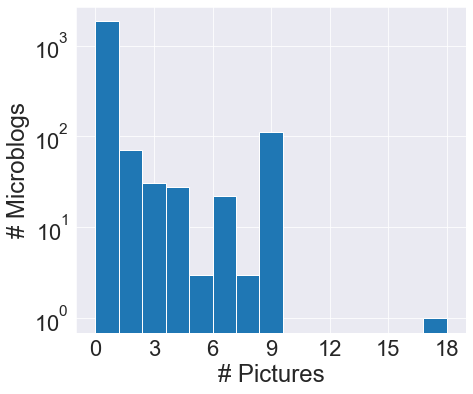

In [16]:
hist_kws = {'alpha': 1}
pics = dfs['pic_url'].values
pics = np.array(pics, dtype=str)
nums = np.zeros(pics.shape, dtype=int)
for idx, pic in enumerate(pics):
    if pic == "[]":
        nums[idx] = 0
    else:
        pic_url = pic[1:-1].split(',')
        nums[idx] = len(pic_url)
        
plt.figure(figsize=(7,6))
ax = sns.distplot(nums,hist=True, kde=False, bins=15, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Pictures')
plt.ylabel('# Microblogs')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.xlim([nums.min()-1,nums.max()+1])
#plt.xticks(np.arange(nums.max()+1))
plt.xticks([0,3,6,9,12,15,18])
ax.set_yscale('log')
plt.savefig("./numOfPic_numOfWb.pdf",bbox_inches='tight')
plt.show()

The avrage is 216.04584120982986
The median is 154.0


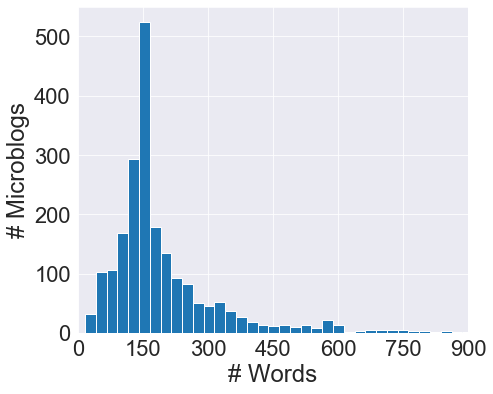

top 80% : 257
top 90% : 367
percent: 31.43%
percent: 44.09%


In [17]:
texts = dfs['text'].values
texts = np.array(texts, dtype=str)
text_nums = np.zeros(texts.shape, dtype=int)

for idx, t in enumerate(texts):
    text_nums[idx] = len(t)
    #print(text_nums[idx])

nums = text_nums
#AVRAGE
nsum=0
for i in range(len(nums)):
    nsum += nums[i]
    avrage = nsum / len(nums)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [nums[i] for i in range(len(nums))]
listnum.sort()
lnum = len(nums)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))
    
plt.figure(figsize=(7,6))
ax = sns.distplot(nums, bins=200, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Words')
plt.ylabel('# Microblogs')
plt.xlim([0, 900])
plt.xticks([0,150,300,450,600,750,900])
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("./numOfWords_numOfWb.pdf",bbox_inches='tight')
plt.show()

aaa=int(lnum*0.8)
ccc=140
ddd = 150
print('top 80% : '+ str(listnum[aaa]))

bbb=int(lnum*0.9)
print('top 90% : '+ str(listnum[bbb]))

listnum.index(ccc)/len(listnum)
print('percent: {:.2%}'.format(listnum.index(ccc)/len(listnum)))

listnum.index(ddd)/len(listnum)
print('percent: {:.2%}'.format(listnum.index(ddd)/len(listnum)))

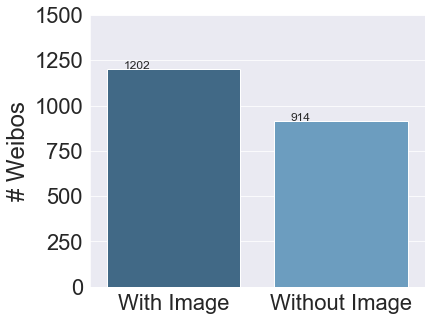

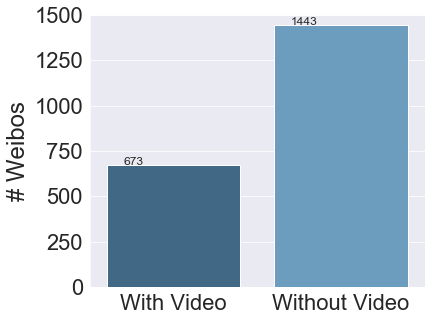

In [18]:
hist_kws = {'alpha': 1}
pics = dfs['pic_url'].values
pics = np.array(pics, dtype=str)
#print(pics)
#print(len(pics))
nopic = 0
wpic = 0
_img = []
for idx, pic in enumerate(pics):
    if pic == "[]":
        nopic = nopic+1
    else:
        wpic = wpic+1
_img = [wpic,nopic]


vis = dfs['video_url'].values
vis = np.array(vis, dtype=str)

nov = 0
wv = 0
for idx, v in enumerate(vis):
    if v == "nan":
        nov = nov+1
    else:
        wv = wv+1
_vis = [wv,nov]
plt.figure(figsize=(6,5))
x = ["With Image","Without Image"]
y = _img
ax = sns.barplot(x,y,palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
plt.ylabel('# Weibos')
plt.ylim([0,1500])
plt.savefig("./wb&img.pdf",bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,5))
x = ["With Video","Without Video"]
y = _vis
ax = sns.barplot(x,y,palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
plt.ylabel('# Weibos')
plt.ylim([0,1500])
#ax.set_yscale('log')
plt.savefig("./wb&video.pdf",bbox_inches='tight')
plt.show()

comment_num = []
hist_kws = {'alpha': 1}
dfs = pd.read_csv('total.csv')
for c in dfs['comments_num']:
    comment_num.append(c)

ax = sns.distplot(comment_num, bins=150, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Comment')
plt.ylabel('# Microblogs')
print(min(comment_num),max(comment_num))
plt.xlim([0,20000])
plt.xticks([0,4000,8000,12000,16000,20000],rotation=45, horizontalalignment='right')
ax.set_yscale('log')

plt.savefig("./numOfComment_numOfWB.pdf",bbox_inches='tight')
plt.show()

#AVRAGE
nsum=0
for i in range(len(comment_num)):
    nsum += comment_num[i]
    avrage = nsum / len(comment_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [comment_num[i] for i in range(len(comment_num))]
listnum.sort()
lnum = len(comment_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))

aaa=int(lnum*0.8)
print('top 80% : '+ str(listnum[aaa]))

bbb=int(lnum*0.9)
print('top 90% : '+ str(listnum[bbb]))

0 1886915


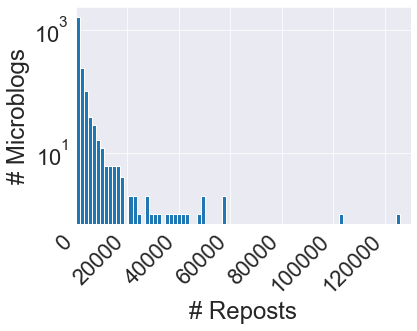

The avrage is 3481.7008506616257
The median is 585.5


In [19]:
repost_num = []
hist_kws = {'alpha': 1}
dfs = pd.read_csv('news_total.csv')
for r in dfs['repost_num']:
    repost_num.append(r)

#plt.figure(figsize=(7,6))
ax = sns.distplot(repost_num, bins=1200,hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
print(min(repost_num),max(repost_num))
plt.xlim([0,130000])
plt.xticks([0,20000,40000,60000,80000,100000,120000],rotation=45, horizontalalignment='right')
ax.set_yscale('log')

plt.savefig("./numOfRepost_numOfWB.pdf",bbox_inches='tight')
plt.show()

#AVRAGE
nsum=0
for i in range(len(repost_num)):
    nsum += repost_num[i]
    avrage = nsum / len(repost_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [repost_num[i] for i in range(len(repost_num))]
listnum.sort()
lnum = len(repost_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))


0 1179103


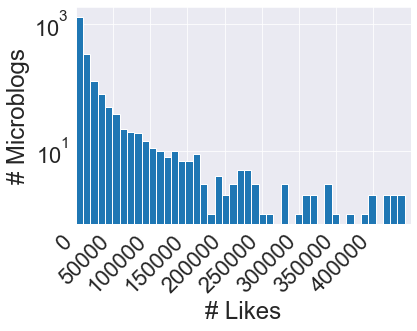

The avrage is 26851.602079395085
The median is 6179.0


In [7]:
like_num = []
hist_kws = {'alpha': 1}
dfs = pd.read_csv('news_total.csv')
for l in dfs['like_num']:
    like_num.append(l)

ax = sns.distplot(like_num, bins=120, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.xlim([0, 450000])
plt.xticks([0,50000,100000,150000,200000,250000,300000,350000,400000],rotation=45, horizontalalignment='right')
ax.set_yscale('log')
print(min(like_num),max(like_num))
plt.savefig("./numOfLike_numOfWB.pdf",bbox_inches='tight')
plt.show()

#AVRAGE
nsum=0
for i in range(len(like_num)):
    nsum += like_num[i]
    avrage = nsum / len(like_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [like_num[i] for i in range(len(like_num))]
listnum.sort()
lnum = len(like_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))



冠状病毒 289
新冠肺炎 1352
新冠 739
疫情 1701
疫区 3
传染 36
感染 376
确诊 2162
死亡病例 324
输入病例 118
输入性传播 2
世界卫生组织 47
世卫 241
钟南山 165
张文宏 36
李文亮 65
福奇 23
口罩 370
试剂盒 24
核酸检测 539
疫苗 108
抗体 62
火神山 34
雷神山 141
隔离 718
封城 43
防控 651
群体免疫 10
健康码 17
健康宝 13
战疫 236
抗疫 505
援鄂 147
n95 11
coronavirus 3
covid 9
who 6
cdc 4
不存在的词: ['sars-cov-2']


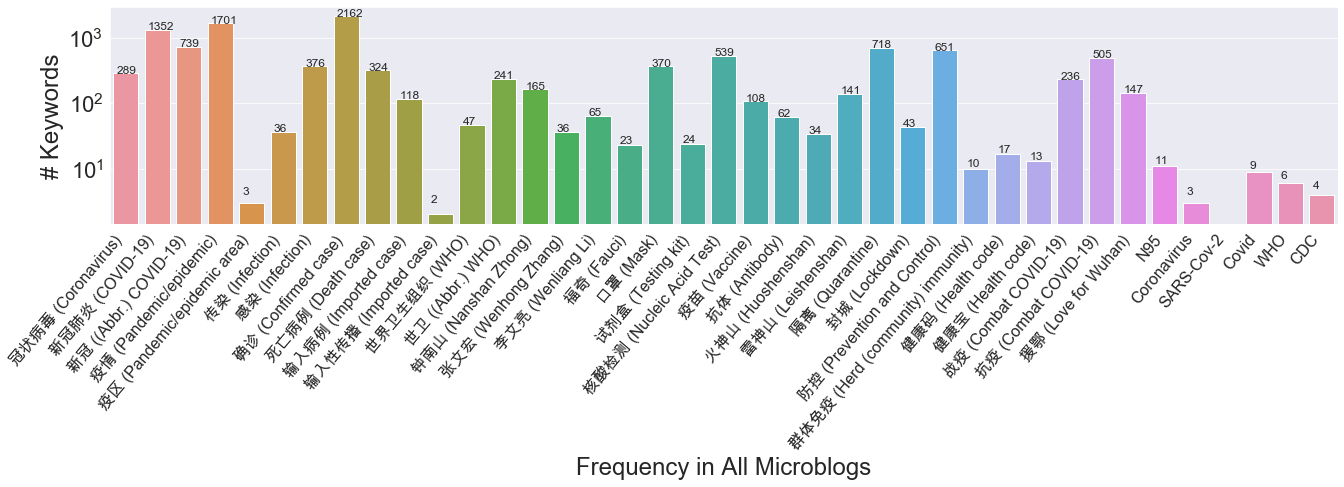

In [21]:
text = []
hist_kws = {'alpha': 1}
dfs = pd.read_csv('news_total.csv')
for l in dfs['text']:
    text.append(l)
    
data_str="\n".join(text)
file=open('keywords.txt','w+') 
file.write(str(data_str).lower()); 
file.close()

import jieba

txt = open("keywords.txt", encoding="utf-8").read()
def jiebafenci(txt,wordslist):
    jieba.load_userdict('list.txt')
    words  = jieba.lcut(txt) 
    counts = {}  
    for word in words:  
        counts[word] = counts.get(word,0) + 1
    x =[]
    y =[]
    lst=[]
    for i in range(len(wordslist)):
        try:
            x.append(wordslist[i])
            y.append(counts[wordslist[i]])
            print(wordslist[i],counts[wordslist[i]])
            
        except:
            lst.append(wordslist[i])
            y.append(0)
    print('不存在的词:',lst)
    #print(x)
    #print(y)
    key_t2 = ['冠状病毒\n(Coronavirus)','新冠肺炎\n(COVID-19)','新冠\n((Abbr.) COVID-19)','疫情\n(Pandemic/epidemic)','疫区\n(Pandemic/epidemic area)','传染\n(Infection)','感染\n(Infection)','确诊\n(Confirmed case)','死亡病例\n(Death case)','输入病例\n(Imported case)','输入性传播\n(Imported case)','世界卫生组织\n(WHO)','世卫\n((Abbr.) WHO)','钟南山\n(Nanshan Zhong)','张文宏\n(Wenhong Zhang)','李文亮\n(Wenliang Li)','福奇\n(Fauci)','口罩\n(Mask)','试剂盒\n(Testing kit)','核酸检测\n(Nucleic Acid Test)','疫苗\n(Vaccine)','抗体\n(Antibody)','火神山\n(Huoshenshan)','雷神山\n(Leishenshan)','隔离\n(Quarantine)','封城\n(Lockdown)','防控\n(Prevention and Control)','群体免疫\n(Herd (community) immunity)','健康码\n(Health code)','健康宝\n(Health code)','战疫\n(Combat COVID-19)','抗疫\n(Combat COVID-19)','援鄂\n(Love for Wuhan)','N95','Coronavirus','SARS-Cov-2','Covid','WHO','CDC']
    key_t = ['冠状病毒 (Coronavirus)','新冠肺炎 (COVID-19)','新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','疫区 (Pandemic/epidemic area)','传染 (Infection)','感染 (Infection)','确诊 (Confirmed case)','死亡病例 (Death case)','输入病例 (Imported case)','输入性传播 (Imported case)','世界卫生组织 (WHO)','世卫 ((Abbr.) WHO)','钟南山 (Nanshan Zhong)','张文宏 (Wenhong Zhang)','李文亮 (Wenliang Li)','福奇 (Fauci)','口罩 (Mask)','试剂盒 (Testing kit)','核酸检测 (Nucleic Acid Test)','疫苗 (Vaccine)','抗体 (Antibody)','火神山 (Huoshenshan)','雷神山 (Leishenshan)','隔离 (Quarantine)','封城 (Lockdown)','防控 (Prevention and Control)','群体免疫 (Herd (community) immunity)','健康码 (Health code)','健康宝 (Health code)','战疫 (Combat COVID-19)','抗疫 (Combat COVID-19)','援鄂 (Love for Wuhan)','N95','Coronavirus','SARS-Cov-2','Covid','WHO','CDC']
    plt.figure(figsize=(22,4))
    plt.rcParams["font.family"] = 'Arial Unicode MS'
    ax = sns.barplot(key_t,y)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
    plt.xticks(rotation=50, horizontalalignment='right')
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    ax.set_yscale('log')
    plt.rc('xtick', labelsize=16)
    plt.xlabel('Frequency in All Microblogs')
    plt.ylabel('# Keywords')
    plt.savefig('./FrequencyinAllMicroblogs_numOfKeywords.pdf', bbox_inches='tight')
    
    plt.show()
    

            
if __name__=='__main__':
    txt = open("keywords.txt", encoding="utf-8").read()
    need_words = open("list.txt", encoding="utf-8").read()
    find = []
    for i in need_words.split():
        find.append(i.lower())
    jiebafenci(txt,find)

#import matplotlib
#print(matplotlib.matplotlib_fname())

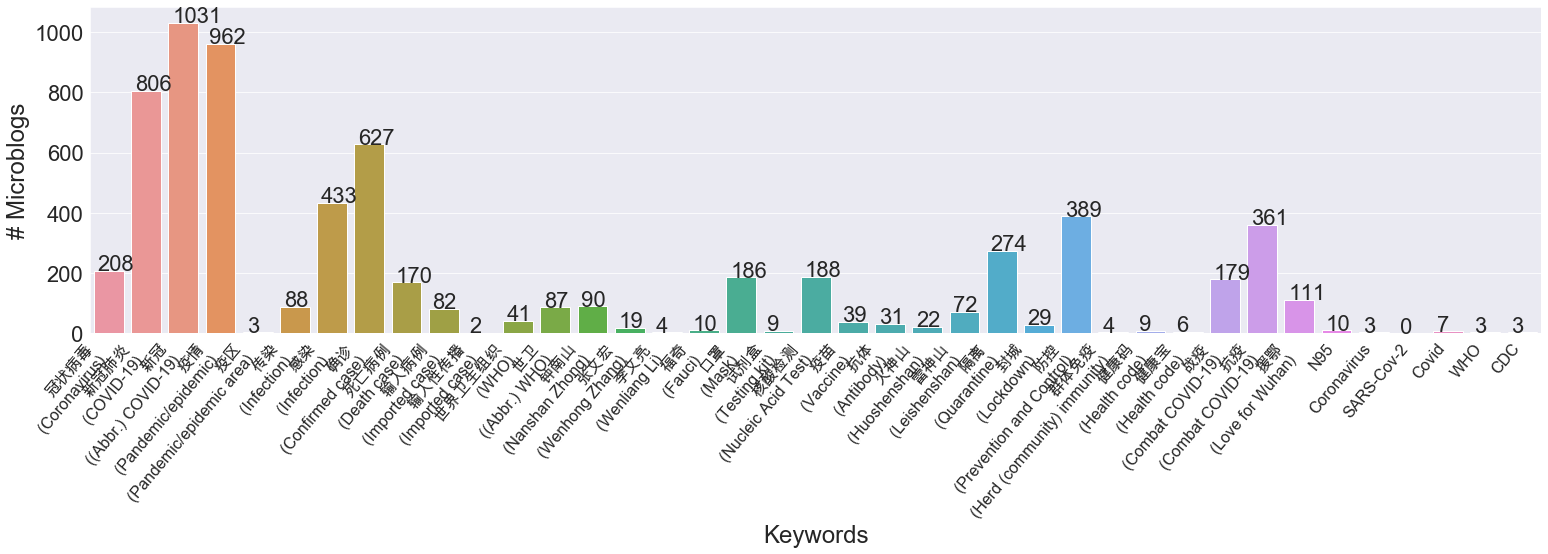

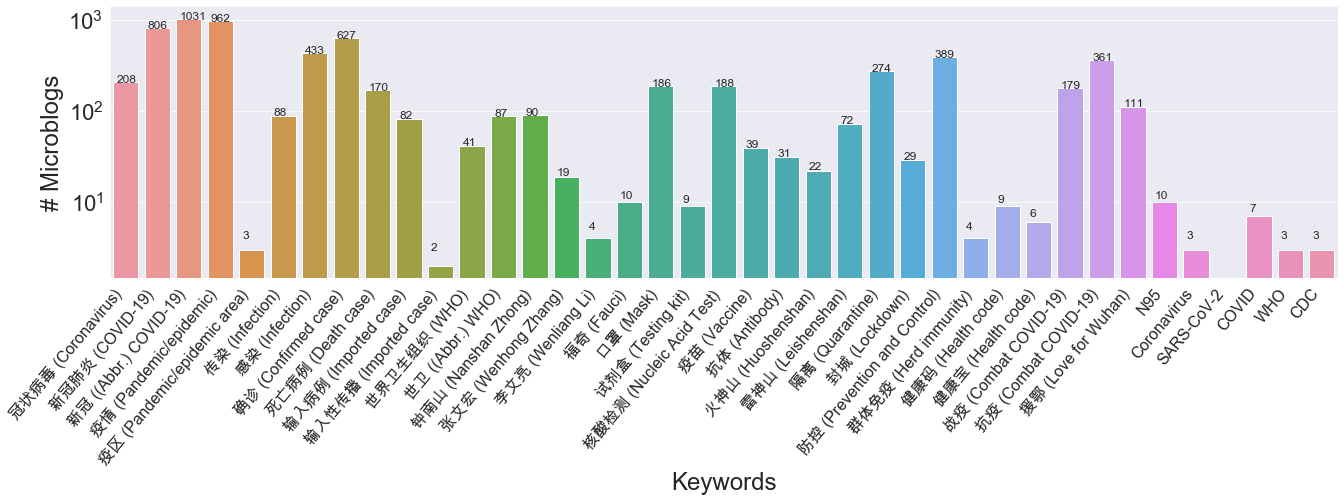

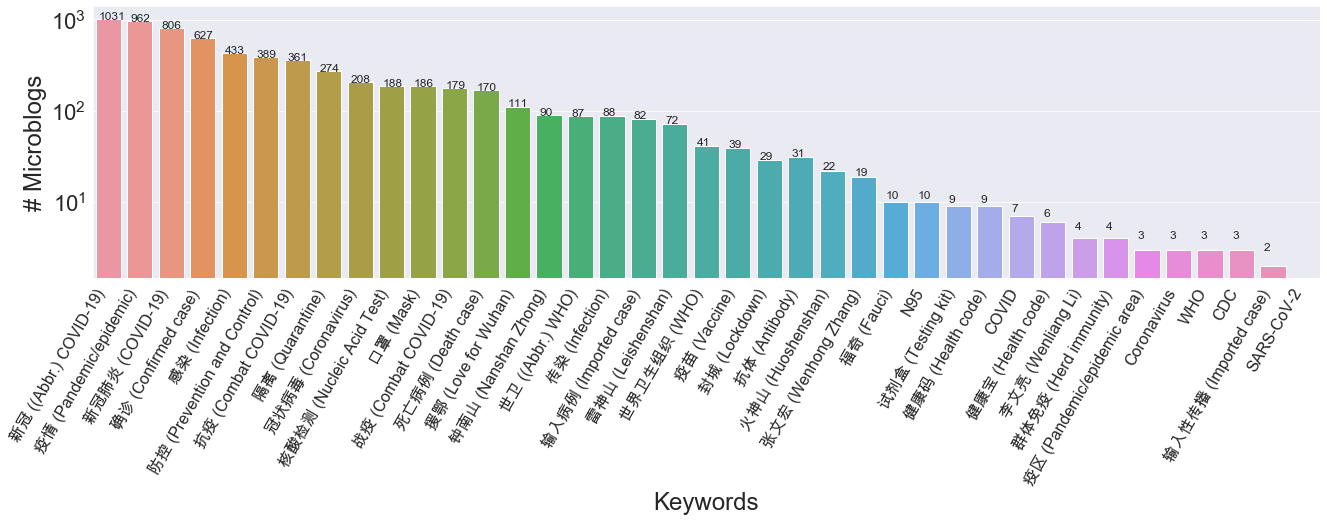

In [22]:
text = []
hist_kws = {'alpha': 1}
dfs = pd.read_csv('news_total.csv')
for l in dfs['text']:
    text.append(l.lower())

num = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]    
key = ['冠状病毒','新冠肺炎','新冠','疫情','疫区','传染','感染','确诊','死亡病例','输入病例','输入性传播','世界卫生组织','世卫','钟南山','张文宏','李文亮','福奇','口罩','试剂盒','核酸检测','疫苗','抗体','火神山','雷神山','隔离','封城','防控','群体免疫','健康码','健康宝','战疫','抗疫','援鄂','n95','coronavirus','sars-cov-2','covid','who','cdc']
key_t2 = ['冠状病毒\n(Coronavirus)','新冠肺炎\n(COVID-19)','新冠\n((Abbr.) COVID-19)','疫情\n(Pandemic/epidemic)','疫区\n(Pandemic/epidemic area)','传染\n(Infection)','感染\n(Infection)','确诊\n(Confirmed case)','死亡病例\n(Death case)','输入病例\n(Imported case)','输入性传播\n(Imported case)','世界卫生组织\n(WHO)','世卫\n((Abbr.) WHO)','钟南山\n(Nanshan Zhong)','张文宏\n(Wenhong Zhang)','李文亮\n(Wenliang Li)','福奇\n(Fauci)','口罩\n(Mask)','试剂盒\n(Testing kit)','核酸检测\n(Nucleic Acid Test)','疫苗\n(Vaccine)','抗体\n(Antibody)','火神山\n(Huoshenshan)','雷神山\n(Leishenshan)','隔离\n(Quarantine)','封城\n(Lockdown)','防控\n(Prevention and Control)','群体免疫\n(Herd (community) immunity)','健康码\n(Health code)','健康宝\n(Health code)','战疫\n(Combat COVID-19)','抗疫\n(Combat COVID-19)','援鄂\n(Love for Wuhan)','N95','Coronavirus','SARS-Cov-2','Covid','WHO','CDC']
key_t = ['冠状病毒 (Coronavirus)','新冠肺炎 (COVID-19)','新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','疫区 (Pandemic/epidemic area)','传染 (Infection)','感染 (Infection)','确诊 (Confirmed case)','死亡病例 (Death case)','输入病例 (Imported case)','输入性传播 (Imported case)','世界卫生组织 (WHO)','世卫 ((Abbr.) WHO)','钟南山 (Nanshan Zhong)','张文宏 (Wenhong Zhang)','李文亮 (Wenliang Li)','福奇 (Fauci)','口罩 (Mask)','试剂盒 (Testing kit)','核酸检测 (Nucleic Acid Test)','疫苗 (Vaccine)','抗体 (Antibody)','火神山 (Huoshenshan)','雷神山 (Leishenshan)','隔离 (Quarantine)','封城 (Lockdown)','防控 (Prevention and Control)','群体免疫 (Herd immunity)','健康码 (Health code)','健康宝 (Health code)','战疫 (Combat COVID-19)','抗疫 (Combat COVID-19)','援鄂 (Love for Wuhan)','N95','Coronavirus','SARS-CoV-2','COVID','WHO','CDC']
for t in text:
    for k in key:
        if k in t:
            index = key.index(k)
            num[index] = num[index]+1

plt.figure(figsize=(26,6))
plt.rcParams["font.family"] = 'Arial Unicode MS'
ax = sns.barplot(key_t2,num)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel('Keywords')
plt.ylabel('# Microblogs')
#plt.savefig('./Keywords_# Microblogs_2.pdf', bbox_inches='tight')
    
plt.show()

plt.figure(figsize=(22,5))
plt.rcParams["font.family"] = 'Arial Unicode MS'
ax = sns.barplot(key_t,num)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
ax.set_yscale('log')
plt.xticks(rotation=50, horizontalalignment='right')
plt.rc('xtick', labelsize=16)
plt.xlabel('Keywords')
plt.ylabel('# Microblogs')
#plt.savefig('./Keywords_numOfMicroblogs.pdf', bbox_inches='tight')
plt.show()


plt.figure(figsize=(22,5))
plt.rcParams["font.family"] = 'Arial Unicode MS'
ax = sns.barplot(key_t,num,order=['新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','新冠肺炎 (COVID-19)','确诊 (Confirmed case)','感染 (Infection)','防控 (Prevention and Control)','抗疫 (Combat COVID-19)','隔离 (Quarantine)','冠状病毒 (Coronavirus)','核酸检测 (Nucleic Acid Test)','口罩 (Mask)','战疫 (Combat COVID-19)','死亡病例 (Death case)','援鄂 (Love for Wuhan)','钟南山 (Nanshan Zhong)','世卫 ((Abbr.) WHO)','传染 (Infection)','输入病例 (Imported case)','雷神山 (Leishenshan)','世界卫生组织 (WHO)','疫苗 (Vaccine)','封城 (Lockdown)','抗体 (Antibody)','火神山 (Huoshenshan)','张文宏 (Wenhong Zhang)','福奇 (Fauci)','N95','试剂盒 (Testing kit)','健康码 (Health code)','COVID','健康宝 (Health code)','李文亮 (Wenliang Li)','群体免疫 (Herd immunity)','疫区 (Pandemic/epidemic area)','Coronavirus','WHO','CDC','输入性传播 (Imported case)','SARS-CoV-2'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
ax.set_yscale('log')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.xticks(rotation=60, horizontalalignment='right')
plt.rc('xtick', labelsize=16)
plt.xlabel('Keywords')
plt.ylabel('# Microblogs')
plt.savefig('./Keywords_numOfMicroblogs_3(60).pdf', bbox_inches='tight')
plt.show()

In [23]:
import jieba
import jieba.analyse
import codecs
import re
from collections import Counter


class WordCounter(object):

    def count_from_file(self, file, top_limit=0):
        with codecs.open(file, 'r', 'utf-8') as f:
            content = f.read()
            content = re.sub(r'\s+', r' ', content)
            content = re.sub(r'\.+', r' ', content)
            return self.count_from_str(content, top_limit=top_limit)

    def count_from_str(self, content, top_limit=0):
        if top_limit <= 0:
            top_limit = 100
        tags = jieba.analyse.extract_tags(content, topK=100)

        words = jieba.cut(content)
        counter = Counter()
        for word in words:
            if word in tags:
                counter[word] += 1

        return counter.most_common(top_limit)

if __name__ == '__main__':
    counter = WordCounter()
    result = counter.count_from_file('keywords.txt', top_limit=200)
    for k, v in result:
        print(k, v)

病例 2491
确诊 2162
疫情 1701
新冠肺炎 1352
新增 1331
美国 1227
中国 867
视频 842
新冠 739
隔离 718
累计 713
报告 667
防控 651
病毒 636
人民日报 632
24 628
北京 627
微博 592
武汉 591
医院 587
工作 543
核酸检测 539
抗疫 505
境外 490
患者 489
输入 460
出院 458
时间 455
截至 435
全球 420
国家 419
其中 417
感染者 416
无症状 412
人员 410
检测 395
目前 393
感染 376
口罩 370
10 363
阳性 358
密切接触 357
死亡 350
治疗 342
人民 339
死亡病例 324
14 321
医学观察 316
湖北 312
肺炎 309
治愈 303
20 300
集中 291
冠状病毒 289
组织 288
18 279
新型 275
症状 265
15 259
17 258
12 254
现有 245
新闻 244
医疗 242
世卫 241
30 236
战疫 236
11 233
22 224
发布会 222
16 219
一线 211
重症 210
疑似病例 209
19 202
13 199
直播 197
21 192
2020 192
23 191
31 189
武汉市 185
专家组 181
特朗普 175
链接 174
25 173
航班 172
网页 170
入境 166
钟南山 165
疾控中心 162
27 153
时至 149
援鄂 147
万例 142
雷神山 141
28 126
29 118
输入病例 118
日晚 116


0 73717


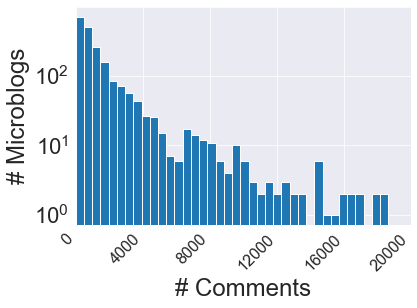

The avrage is 1785.4409262759925
The median is 774.0


In [24]:
comment_num = []
hist_kws = {'alpha': 1}
dfs = pd.read_csv('news_total.csv')
for c in dfs['comments_num']:
    comment_num.append(c)

ax = sns.distplot(comment_num, bins=150, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
print(min(comment_num),max(comment_num))
plt.xlim([0,20000])
plt.xticks([0,4000,8000,12000,16000,20000],rotation=45, horizontalalignment='right')
ax.set_yscale('log')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("./numOfComment_numOfWB.pdf",bbox_inches='tight')
plt.show()

#AVRAGE
nsum=0
for i in range(len(comment_num)):
    nsum += comment_num[i]
    avrage = nsum / len(comment_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [comment_num[i] for i in range(len(comment_num))]
listnum.sort()
lnum = len(comment_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))

